# Visualizing Success: How Album Art Affects Music Popularity
By Thomas D. Laryea IV

October 15th, 2023

A lot of factors go into making an album popular. Whether that is the artist's overall popularity itself or perhaps the time the album was released and what the current trends of that month were, All of these make an album popular, but one overlooked factor is the album art itself. The album art is what initially draws a listener into an album. My hypothesis focuses on this idea and whether or not the complexity of the album art has an effect on the overall popularity of the album.

I believe that the complexity does have an effect on its overall popularity. I believe people will ultimately be turned off by an album cover that has a lot of visual stimuli that will overwhelm the average user and turn them away from the album. Out of albums, I feel that at least 60% of the most popular albums will have "simple" album covers.

For this hypothesis album, I split the albums into two categories: simple and complex. This was a subjective analysis, with simple albums usually following the criteria of a single subject and few colors, with complex albums being the opposite, with multiple items in the frame and multiple colors. Below, I have provided examples of simple and complex albums.

To access the information on the albums I used the Spotify Application Programming Interface (API for short). Within the API, there is a "Get Albums" API request, and within the information provided by Spotify, there is a popularity feature. Below, my work delves into this further.

<img src = "https://preview.redd.it/eiterwv9fdn51.jpg?auto=webp&s=a6de83ab0203a387021631204251581b05b697be" style="width:300px;height:300px;"> 

<h3 style="text-align:center"> A Simple Album Cover </h3>

<img src = "https://upload.wikimedia.org/wikipedia/en/0/0b/Astroworld_by_Travis_Scott.jpg">

<h3 style="text-align:center"> A Complex Album Cover </h3>

Below are the Python packages I have imported to access the Spotify API and create this report.

In [41]:
import requests as rq
import pandas as pd
import base64
import json
import urllib
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## Accessing the API

Accessing the Spotify API requires multiple steps I first had to take my personalized Spotify IDs and read them into this Notebook from a text file I created that holds them. 

In [2]:
Client_ID = pd.read_csv('Spotify_Keys.txt')['Client_ID'].iloc[0]

In [3]:
Client_Secret = pd.read_csv('Spotify_Keys.txt')['Client_Secret'].iloc[0]

In [4]:
# Client_ID

In [5]:
# Client_Secret

Below I am encoding my credentials into <em>ascii</em> that allows the Spotify servers to read my credentials and allow me to access their data.

In [6]:
clientCred = base64.b64encode(str(Client_ID + ":"+ Client_Secret).encode("ascii"))

In [7]:
# clientCred

In [8]:
headers = {"Authorization": "Basic {}".format (clientCred.decode("ascii"))}

In [9]:
# headers

Below is my initial call to the Spotify Servers requesting access to use their data

In [10]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [11]:
sessionKeyResponse = rq.post(url = url, data = payload, headers = headers)

In [12]:
sessionKeyResponse.status_code

200

In [13]:
# sessionKeyResponse.json()

In [14]:
accessKey = sessionKeyResponse.json()["access_token"]

In [15]:
sessionHeaders = {"Authorization": "Bearer {}".format(accessKey)}

In [16]:
# sessionHeaders

## Calling the API and Using Album IDs

In order to access the data on the albums, In order to find albums I decided to find multiple lists of the top albums of all time . I had to find the album IDs and place them within a list. I made an excel sheet of the ids and the classification of the album art I then loaded it into the notebook using the read csv function of Pandas. The API only allows the calling of 20 albums at a time so I had to separate my list into two sheets and merge the data together. 

In [17]:
albumIds = pd.read_csv('Album Data3.csv')['Album ID']
albumArt = pd.read_csv('Album Data3.csv')['Art Type']

In [18]:
albumIds2 = pd.read_csv('Album Data4.csv')['Album ID']
albumArt2 = pd.read_csv('Album Data4.csv')['Art Type']

In [19]:
#albumIds

In [20]:
spotifyIds =','.join(list(albumIds))
spotifyIds2 =','.join(list(albumIds2))
#Placing the ids into a comma separated list to send to the api

In [21]:
albumsUrl = "https://api.spotify.com/v1/albums?ids={}"\
.format(spotifyIds)
#Calling the API with the IDs 


albumsUrl2 = "https://api.spotify.com/v1/albums?ids={}"\
.format(spotifyIds2)
#Calling the API with the IDs 

In [22]:
#albumsUrl

Below I send my request to the API and get a response with the data within a JSON file that I can parse for the data I need

In [23]:
response = rq.get(url = albumsUrl, headers = sessionHeaders)

response2 = rq.get(url = albumsUrl2, headers = sessionHeaders)

In [24]:
response.status_code

200

## Combing the Data

The API provided me with a JSON dictionary containing multiple elements for my purposes I needed a few specific variables from within the data. Using list comprehension to pull out the sections I needed I grabbed the <em><b>Popularity, Album Name, Track Name, and Release Date. </em></b>As mentioned before the API only allows for 20 albums at a time so I had to duplicate everything which is why every variable has a 2 variant of it. I then put everything into a Dataframe to see what the data tells us.

In [25]:
album = response.json()
album2 = response2.json()
# Creating variables called Album which is simply the json file I received from Spotify

In [26]:
popularityTot = [x["popularity"] for x in album["albums"]]
popularityTot2 = [x["popularity"] for x in album2["albums"]]
# Grabbing the list of popularity numbers

In [27]:
names = [x["name"] for x in album["albums"]]
names2 = [x["name"] for x in album2["albums"]]
# Grabbing the list of album titles

In [28]:
tracks = [x["total_tracks"] for x in album["albums"]]
tracks2 = [x["total_tracks"] for x in album2["albums"]]
# Grabbing the total track numbers 

In [29]:
released = [x["release_date"] for x in album["albums"]]
released2 = [x["release_date"] for x in album2["albums"]]
# Grabbing the release date

## Creating Dataframes 

Below I am placing the data I grabbed from the JSON file and placing them into separate data frames that I can later merge them into one. In addition to that, I am renaming the columns to the respective names

In [30]:
popularity = pd.DataFrame(popularityTot)
releaseDate = pd.DataFrame(released)
artType = pd.DataFrame(albumArt)
nameData = pd.DataFrame(names)
trackData = pd.DataFrame(tracks)
# Creating the Individual DataFrames

In [31]:
popularity2 = pd.DataFrame(popularityTot2)
releaseDate2 = pd.DataFrame(released2)
artType2 = pd.DataFrame(albumArt2)
nameData2 = pd.DataFrame(names2)
trackData2 = pd.DataFrame(tracks2)
# Creating DataFrames with the second set of Data

In [32]:
trackData.rename(columns = {0: 'Total Tracks'}, inplace = True )
nameData.rename(columns = {0:'Album Title'}, inplace = True)
releaseDate.rename(columns = {0:'Release Date'}, inplace = True)
popularity.rename(columns = {0:'Popularity'}, inplace = True)
# Renaming the first set of columns

In [33]:
trackData2.rename(columns = {0: 'Total Tracks'}, inplace = True )
nameData2.rename(columns = {0:'Album Title'}, inplace = True)
releaseDate2.rename(columns = {0:'Release Date'}, inplace = True)
popularity2.rename(columns = {0:'Popularity'}, inplace = True)
# Renaming the second set of columns

Below I am placing all the DataFrames into one large DataFrame and sorting them by the popularity variable to see which albums are the most popular.

In [34]:
popularityInfo= pd.concat([nameData,popularity,artType,trackData,releaseDate],axis=1, join="inner")
popularityInfo2= pd.concat([nameData2,popularity2,artType2,trackData2,releaseDate2],axis=1, join="inner")
totalPopularity=pd.concat([popularityInfo,popularityInfo2])

## Final DataFrame
Below is the final table of popularity containing all 40 albums (20 Complex, 20 Simple)

In [35]:
totalPopularity.sort_values(by=['Popularity'], ascending = False)
# Sorting by popularity

,Album Title,Popularity,Art Type,Total Tracks,Release Date
16,GUTS,95,Simple,12,2023-09-08
14,SOS,90,Simple,23,2022-12-09
1,Red (Taylor's Version),89,Simple,30,2021-11-12
6,Blonde,86,Simple,17,2016-08-20
14,Fearless (Taylor's Version),86,Simple,26,2021-04-09
18,ASTROWORLD,85,Complex,17,2018-08-03
7,Scorpion,84,Simple,25,2018-06-29
9,Norman Fucking Rockwell!,84,Complex,14,2019-08-30
7,channel ORANGE,83,Simple,17,2012-07-10
13,Currents,83,Complex,13,2015-07-17


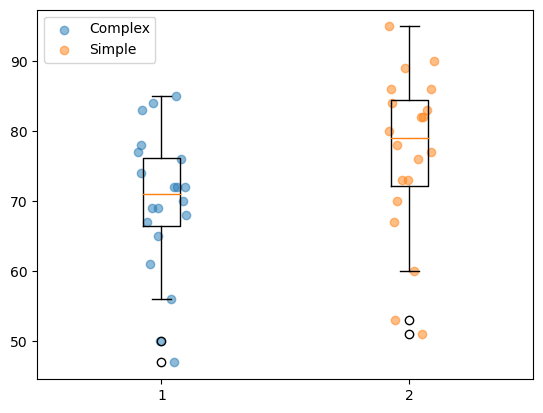

In [39]:
simp_val = totalPopularity[totalPopularity['Art Type'] == 'Simple']['Popularity']
comp_val = totalPopularity[totalPopularity['Art Type'] == 'Complex']['Popularity']

comp_xs = [1] * len(comp_val)
simp_xs = [2] * len(simp_val)

comp_x_jitter = np.random.uniform(-.10, .10, len(comp_xs))
simp_x_jitter = np.random.uniform(-.10, .10, len(simp_xs))

fig1, ax1 = plt.subplots()
ax1.boxplot(comp_val, positions = [1])
ax1.boxplot(simp_val, positions = [2])
ax1.scatter(comp_xs + comp_x_jitter, comp_val, alpha = .5, label = "Complex")
ax1.scatter(simp_xs + simp_x_jitter, simp_val, alpha = .5, label = "Simple")
ax1.legend()

plt.show()

In [42]:
result1 = stats.ttest_ind(simp_val,comp_val)

In [43]:
result1.pvalue

0.053229744745321404

## Conclusion

The table shows a very clear trend showing that complex album arts tend to score lower on the popularity scale, with simple albums making up 65% of the top half of albums. I believe my theory of visual complexity overwhelms the listener and turns them away.

With this data, there are some issues and limitations that arise. Obviously, the complexity of the album art is very subjective to me, and what I find simple and complex can be vastly different from what you may believe. I overall tried to follow a formula based on colors and subjects to create my list of simplicity and complexity, but that was one limiting factor. In addition to that, recency bias may lead to inflated popularity numbers. For example, the album "Guts" by Olivia Rodrigo was recently released, and many listeners are still listening to it, so this may result in an inflated popularity number. Compare this to an album like Thriller, which is the best-selling album of all time, but it was released in the 1980s, so the popularity will clearly be much lower and not a true reflection of the popularity. Another limitation would be the genres included. I attempted to include every genre, but some genres are simply not as popular with modern music listeners, so the data reflects a lower popularity number, but this number is in relation to all genres. If I got the popularity within the genre, we could potentially see a difference in the popularity number.

Going forward to get a more complex analysis I would separate the albums by genre and create smaller dataframes based off of the popularity and adjust the numbers to get a clearer picture of whether or not album truly affects the popularity.